## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("jet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jet.bmp --no-check-certificate



In [2]:
def calcHist (I):
    return cv2.calcHist([I], [0], None, [256], [0, 256])

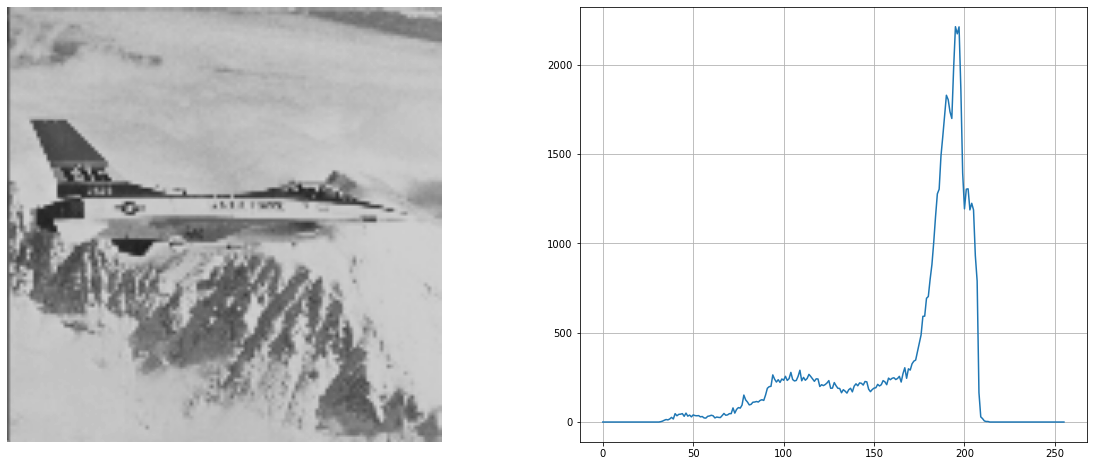

In [3]:
I = cv2.imread('jet.bmp', cv2.IMREAD_GRAYSCALE)
H = calcHist(I)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 8)

axs[0].imshow(I, 'gray', vmin=0, vmax=256)
axs[0].axis('off')
axs[1].plot(H)
axs[1].grid()

### BBHE

In [4]:
pivot = round(np.mean(I))
print (pivot)

169


In [5]:
H1, H2 = H[:pivot], H[pivot:]
C1 = H1.cumsum()
C2 = H2.cumsum()
C1 /= C1.max()
C2 /= C2.max()
C1 *= pivot
C2 = pivot + 1 + (255 - pivot - 1) * C2
arr = np.concatenate([C1, C2])

In [6]:
BBHE = cv2.LUT (I, arr)

### DSIHE

In [7]:
H_c = H.cumsum()
arr = np.abs(H_c - H_c[-1]/2)
pivot = np.argmin(arr)
print (pivot)

186


In [8]:
H1, H2 = H[:pivot], H[pivot:]
C1 = H1.cumsum()
C2 = H2.cumsum()
C1 /= C1.max()
C2 /= C2.max()
C1 *= pivot
C2 = pivot + 1 + (255 - pivot - 1) * C2
arr = np.concatenate([C1, C2])

In [9]:
DSIHE = cv2.LUT (I, arr)

### HE

In [10]:
HE = cv2.equalizeHist(I)

### Porównanie

In [11]:
def cum(H):
    C = H.cumsum()
    C *= (H.max() / C.max())
    return C

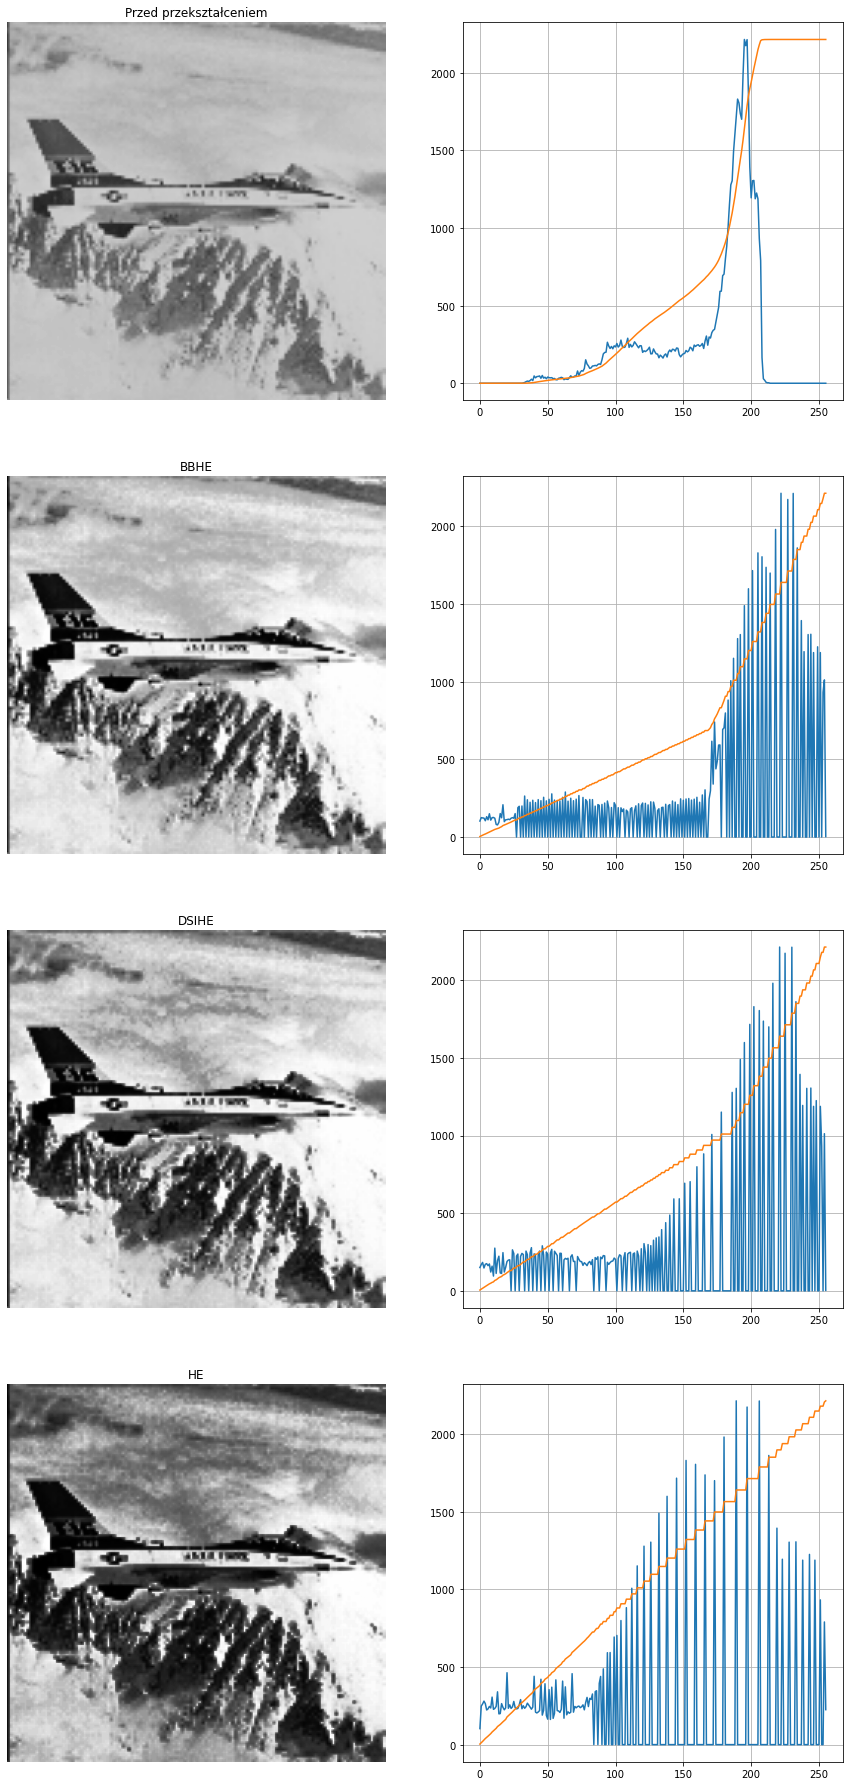

In [12]:
fig, axs = plt.subplots(4, 2)
fig.set_size_inches(15, 32)

H_BBHE = calcHist(BBHE)
H_DSIHE = calcHist(DSIHE)
H_HE = calcHist(HE)

axs[0, 0].imshow(I, 'gray', vmin=0, vmax=256)
axs[0, 0].axis('off')
axs[0, 0].set_title('Przed przekształceniem')
axs[0, 1].plot(H)
axs[0, 1].plot(cum(H))
axs[0, 1].grid()

axs[1, 0].imshow(BBHE, 'gray', vmin=0, vmax=256)
axs[1, 0].axis('off')
axs[1, 0].set_title('BBHE')
axs[1, 1].plot(H_BBHE)
axs[1, 1].plot(cum(H_BBHE))
axs[1, 1].grid()

axs[2, 0].imshow(DSIHE, 'gray', vmin=0, vmax=256)
axs[2, 0].axis('off')
axs[2, 0].set_title('DSIHE')
axs[2, 1].plot(H_DSIHE)
axs[2, 1].plot(cum(H_DSIHE))
axs[2, 1].grid()

axs[3, 0].imshow(HE, 'gray', vmin=0, vmax=256)
axs[3, 0].axis('off')
axs[3, 0].set_title('HE')
axs[3, 1].plot(H_HE)
axs[3, 1].plot(cum(H_HE))
axs[3, 1].grid()

Obraz źródłowy jest bardzo jasny. Po przekształceniu HE jest ciemny natomiast po przekształceniach BBHE i DSIHE jest jaśniejszy, więc lepiej oddaje wygląd obrazu na początku. Cechą charakterystyczną naszego obrazu jest niska gęstość pikseli ciemnych i duża liczba pewnych pikseli jasnych, w takim przypadku klasyczne HE nie działa najlepiej, ale ulepszone wersje już tak.